$$
H=\frac{1}{2} mL^2 \dot{\theta}^2 + mgL(1-cos\theta)-FL\theta=H_0
$$

$$
    \dot{\theta}=\sqrt{\frac{2}{mL^2}\{H-(mgL(1-cos\theta)-FL\theta )\}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dot_theta_square(theta, F, L, H, m,g=10):
    A=m*g*L*(1-np.cos(theta))-F*L*theta
    A=H-A
    A=2*A/(m*L**2)
    # prjnt(A)
    return A

In [3]:
m=1
F=1
L=0.5
H=10
g=10


colors = ['red', 'green', 'blue', 'orange', 'purple',
        'yellow', 'cyan', 'magenta', 'ljme', 'pink']



In [33]:
def get_data(F, L, H, m,g=10,sep=0.0001):
    theta_lis=np.arange(-1*np.pi, 1*np.pi, sep)
    theta=[]
    dot_theta_square_lis=[]
    for i in theta_lis:
        if dot_theta_square(i,F,L,H,m) > 0:
            theta.append(i)
            dot_theta_square_lis.append(dot_theta_square(i,F,L,H,m,g=g))
    theta=np.array(theta)
    dot_theta_square_lis=np.array(dot_theta_square_lis)
    return theta,dot_theta_square_lis

In [5]:
theta,dot_theta_square_lis=get_data(F=F, L=L, H=H, m=m,g=10)

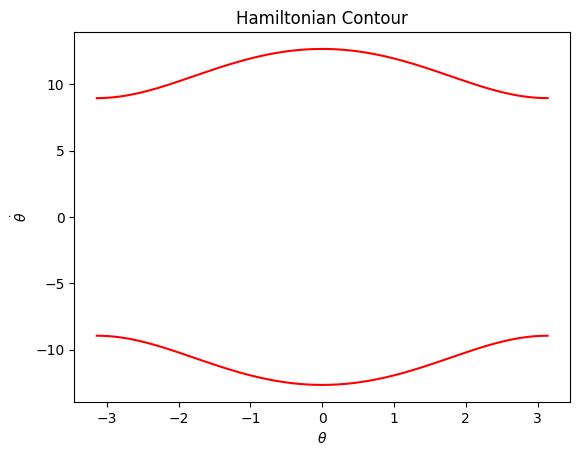

In [6]:
plt.figure()
dot_theta=np.sqrt(dot_theta_square_lis)
plt.plot(theta,dot_theta,colors[0])
plt.plot(theta,-dot_theta,colors[0])
plt.title("Hamiltonian Contour")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.show()

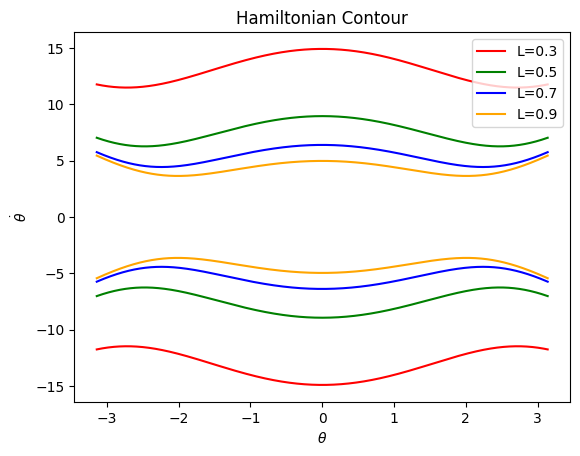

In [21]:
# 改变摆长
plt.figure()
L_lis=[0.3,0.5,0.7,0.9]
fig_lis=[]
for i,L in enumerate(L_lis):
    theta,dot_theta_square_lis=get_data(F=F, L=L, H=H, m=m,g=10)
    dot_theta=np.sqrt(dot_theta_square_lis)
    p,=plt.plot(theta,dot_theta,colors[i])
    plt.plot(theta,-dot_theta,colors[i])
    fig_lis.append(p)
plt.legend(fig_lis,[f"L={i}" for i in L_lis],loc="upper right")
plt.title("Hamiltonian Contour")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.show()

-0.5555555555555556
-0.2222222222222222
-0.1111111111111111
0.0
0.1111111111111111
0.2222222222222222
0.5555555555555556


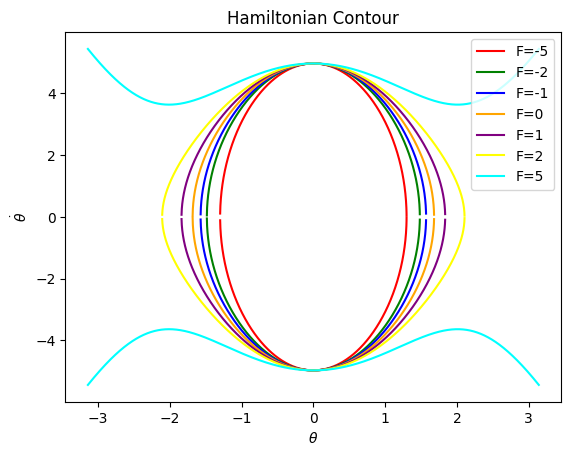

In [27]:
# 改变力
plt.figure()
F_lis=[-5,-2,-1,0,1,2,5]
# F_lis=[0]
fig_lis=[]
for i,F in enumerate(F_lis):
    theta,dot_theta_square_lis=get_data(F=F, L=L, H=10, m=m,g=10,sep=0.0005)
    print(F/(m*g*L))
    dot_theta=np.sqrt(dot_theta_square_lis)
    p,=plt.plot(theta,dot_theta,colors[i])
    plt.plot(theta,-dot_theta,colors[i])
    fig_lis.append(p)
plt.legend(fig_lis,[f"F={i}" for i in F_lis],loc="upper right")
plt.title("Hamiltonian Contour")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.show()

In [66]:
L

0.5

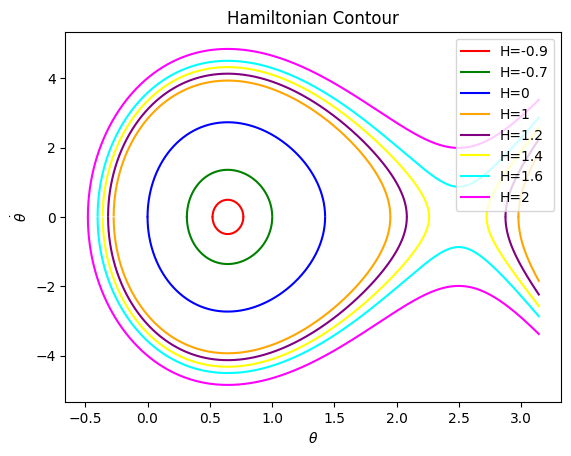

In [62]:
# 改变H
plt.figure()
H_lis=[-0.9,-0.7,0,1,1.2,1.4,1.6,2]
# F_lis=[0]
F=0.6*m*g
fig_lis=[]
for i,H in enumerate(H_lis):
    theta,dot_theta_square_lis=get_data(F=F, L=L, H=H, m=m,g=10,sep=0.00005)
    # print(theta)
    cut=-1
    for j in range(2,len(theta)):
        if theta[j]-theta[j-1]>0.1:
            cut=j
            break
    theta1=theta[:cut]
    dot_theta_square_lis1=dot_theta_square_lis[:cut]
    theta2=theta[cut:]
    dot_theta_square_lis2=dot_theta_square_lis[cut:]
    # print(cut)
    dot_theta1=np.sqrt(dot_theta_square_lis1)
    dot_theta2=np.sqrt(dot_theta_square_lis2)
    p,=plt.plot(theta1,dot_theta1,colors[i])
    plt.plot(theta1,-dot_theta1,colors[i])
    plt.plot(theta2,dot_theta2,colors[i])
    plt.plot(theta2,-dot_theta2,colors[i])
    fig_lis.append(p)
plt.legend(fig_lis,[f"H={i}" for i in H_lis],loc="upper right")
plt.title("Hamiltonian Contour")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
# plt.xlim((-np.pi,np.pi))
plt.show()

In [37]:
def V(theta, F, L, m,g=10):
    A=m*g*L*(1-np.cos(theta))-F*L*theta
    # print(A)
    return A

In [82]:
V(0, F, L, m)

0.0

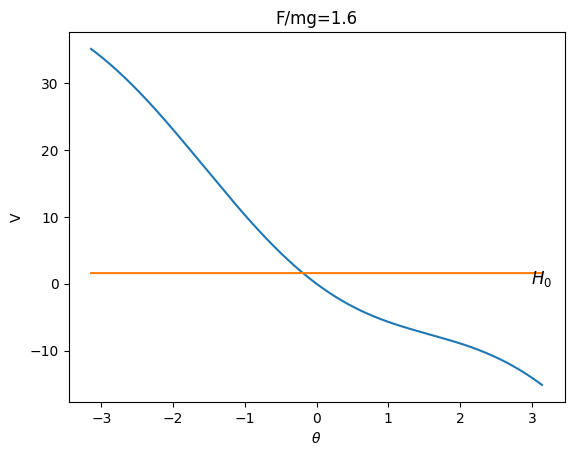

In [64]:
# 改变H
plt.figure()
H_lis=[i for i in range(0,1)]
# F_lis=[0]
F=1.6*m*g
theta_lis=np.arange(-1*np.pi, 1*np.pi, 0.001)
V_lis=V(theta_lis,F,L,m)
plt.plot(theta_lis,V_lis)
plt.plot(theta_lis,[1.6]*len(theta_lis))
plt.text(max(theta_lis), 0, f'$H_0$', fontsize=12, ha='center')
plt.title("F/mg=1.6")
plt.xlabel(r"$\theta$")
plt.ylabel(r"V")
plt.show()